In [51]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

## Introduction About the Data :

The dataset: The goal is to predict price of given diamond (Regression Analysis).

There are 10 independent variables (including id):

- **id** : unique identifier of each diamond
- **carat** : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
- **cut** : Quality of Diamond Cut
- **color** : Color of Diamond
- **clarity** : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
- **depth** : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
- **table** : A diamond's table is the facet which can be seen when the stone is viewed face up.
- **x** : Diamond X dimension
- **y** : Diamond Y dimension
- **z** : Diamond Z dimension

#### Target variable:

- **price** : Price of the given Diamond.

In [52]:
data = pd.read_csv(r"D:\iNeuron Course\End_To_End_ML_Project\notebooks\data\gemstone_train.csv")

data

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...,...
193568,193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681


In [53]:
data.shape

(193573, 11)

### Value counts of categorical features

In [54]:
# total values inside "cut" feature

data["cut"].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [55]:
# total values inside "color" feature

data["color"].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [56]:
# total values inside "clarity" feature

data["clarity"].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

#### Diamond Cut chart

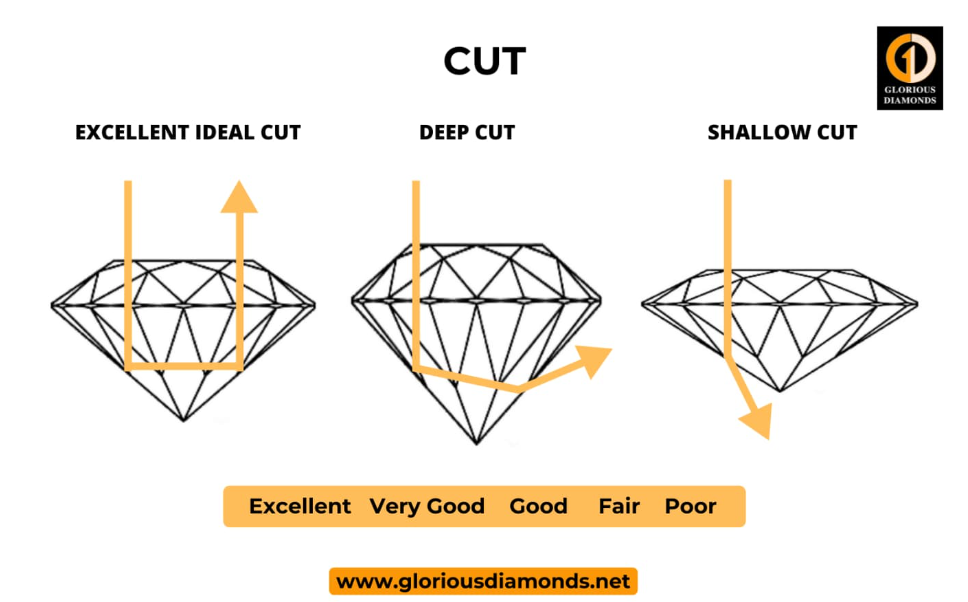

#### Diamond clarity chart

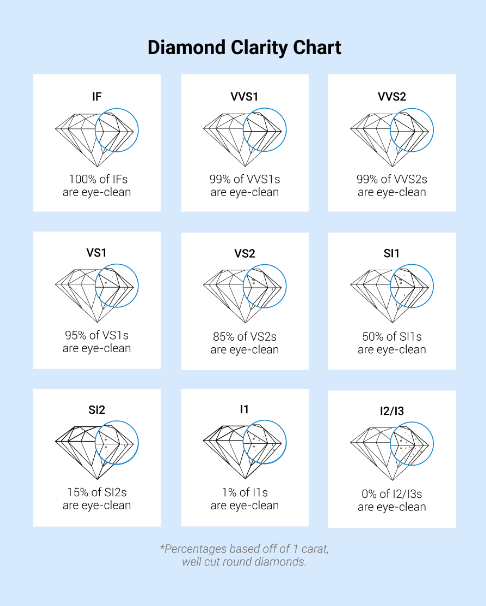

#### Diamond color chart

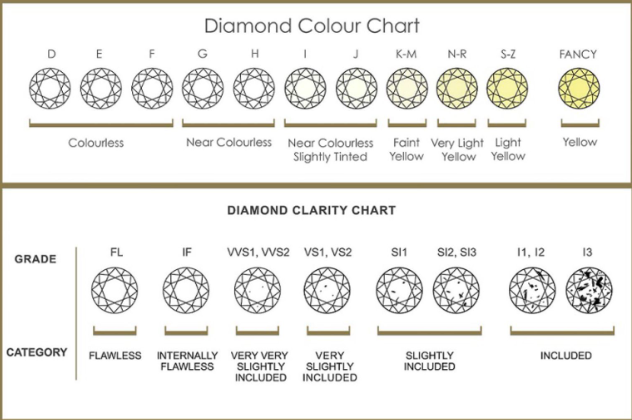

In [57]:
# Checking missing values (if present in the dataframe)

data.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

There are no missing values in the data

In [58]:
# checking the information of the dataframe

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [59]:
# Checking if there is dupilcate rows present in the dataframe

data.duplicated().sum()

0

There are no duplicate rows present in the dataframe

In [60]:
# dropping "id" feature from the dataframe as it plays no role in predicting the price of the gemstone (diamond)

data.drop(["id"], axis=1, inplace=True)

In [61]:
# my data 

data

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...
193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681


## Segregating numerical and categorical features from the dataframe

In [62]:
cat_feature = [column for column in data.columns if data[column].dtypes=="object"]
num_feature = [column for column in data.columns if data[column].dtypes!="object"]

cat_feature, num_feature

(['cut', 'color', 'clarity'],
 ['carat', 'depth', 'table', 'x', 'y', 'z', 'price'])

In [63]:
# Categorical dataframe

data[cat_feature]

,cut,color,clarity
0,Premium,F,VS2
1,Very Good,J,SI2
2,Ideal,G,VS1
3,Ideal,G,VS1
4,Premium,G,VS2
...,...,...,...
193568,Ideal,D,VVS2
193569,Premium,G,VVS2
193570,Very Good,F,SI1
193571,Very Good,D,SI1


In [64]:
# Describing categorical dataframe

data[cat_feature].describe().T

,count,unique,top,freq
cut,193573,5,Ideal,92454
color,193573,7,G,44391
clarity,193573,8,SI1,53272


In [65]:
# Numerical dataframe

data[num_feature]

,carat,depth,table,x,y,z,price
0,1.52,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,61.6,56.0,4.38,4.41,2.71,666
4,1.70,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...
193568,0.31,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,62.9,55.0,4.45,4.49,2.81,681


In [66]:
# Describing categorical dataframe

data[num_feature].describe().T

,count,mean,std,min,25%,50%,75%,max
carat,193573.0,0.790688,0.462688,0.2,0.40,0.70,1.03,3.50
depth,193573.0,61.820574,1.081704,52.1,61.30,61.90,62.40,71.60
table,193573.0,57.227675,1.918844,49.0,56.00,57.00,58.00,79.00
x,193573.0,5.715312,1.109422,0.0,4.70,5.70,6.51,9.65
y,193573.0,5.720094,1.102333,0.0,4.71,5.72,6.51,10.01
z,193573.0,3.534246,0.688922,0.0,2.90,3.53,4.03,31.30
price,193573.0,3969.155414,4034.374138,326.0,951.00,2401.00,5408.00,18818.00


## Visualization of the data

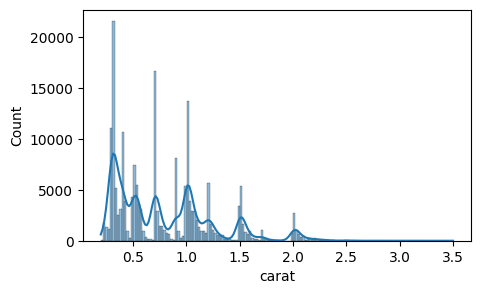

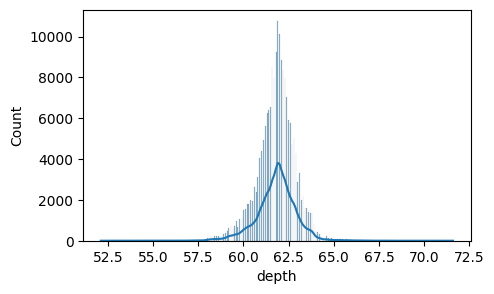

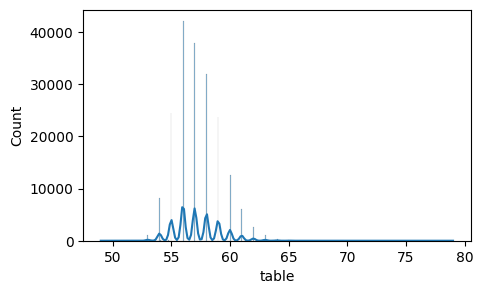

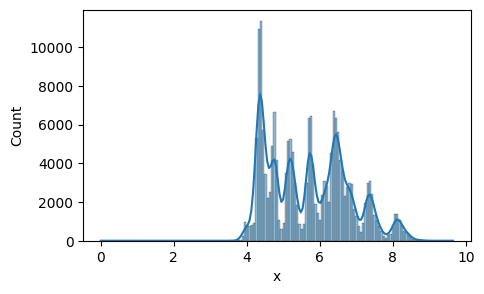

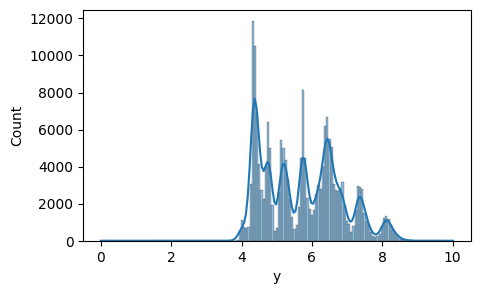

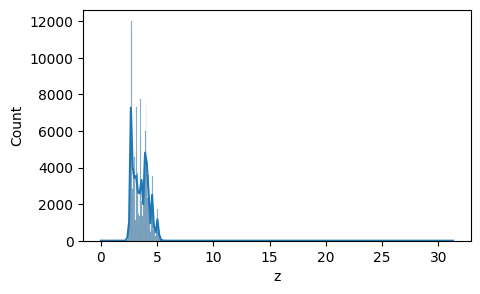

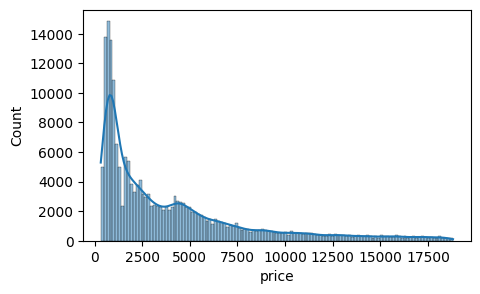

In [67]:
for column in num_feature:
    plt.figure(figsize=(5,3))

    sns.histplot(data=data, x=column, kde=True)
    print("\n")
    plt.show()

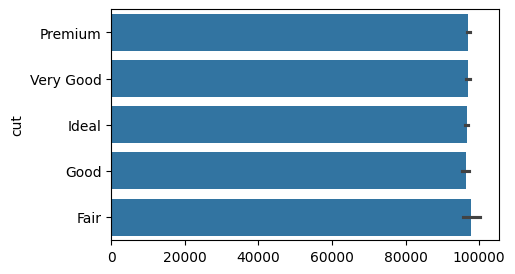

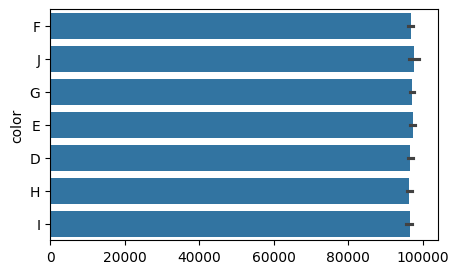

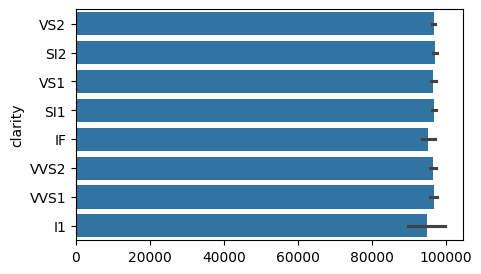

In [68]:
for column in cat_feature:
    plt.figure(figsize=(5,3))

    sns.barplot(data=data[column])
    print("\n")
    plt.show()

### Correlation between numerical feature

In [69]:
data[num_feature].corr()

,carat,depth,table,x,y,z,price
carat,1.000000,0.027852,0.225737,0.980563,0.980161,0.974274,0.943396
depth,0.027852,1.000000,-0.230631,-0.010762,-0.011653,0.081821,0.001880
table,0.225737,-0.230631,1.000000,0.237578,0.233299,0.212208,0.174915
x,0.980563,-0.010762,0.237578,1.000000,0.999109,0.989724,0.901004
y,0.980161,-0.011653,0.233299,0.999109,1.000000,0.989527,0.901033
z,0.974274,0.081821,0.212208,0.989724,0.989527,1.000000,0.893037
price,0.943396,0.001880,0.174915,0.901004,0.901033,0.893037,1.000000


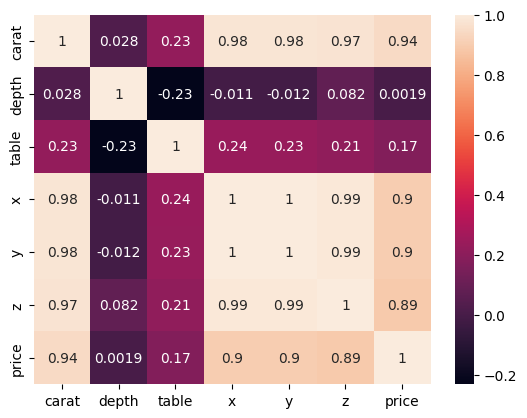

In [70]:
# Visualizing the correlation

sns.heatmap(data=data[num_feature].corr(), annot=True)
plt.show()

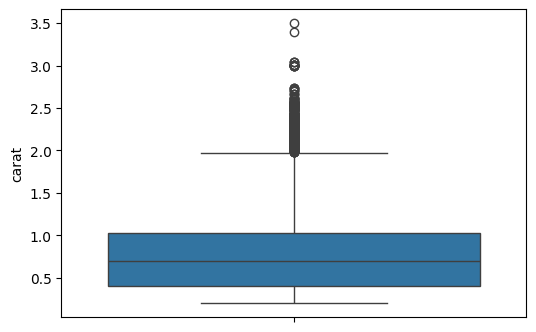

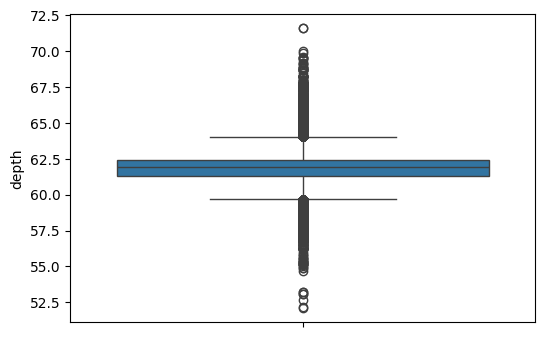

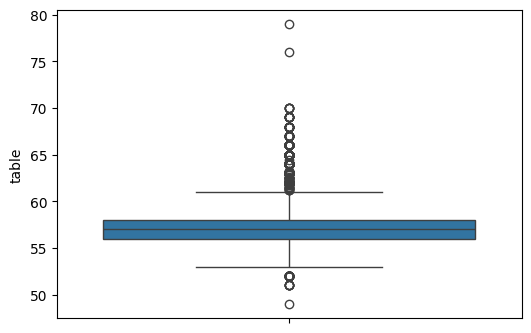

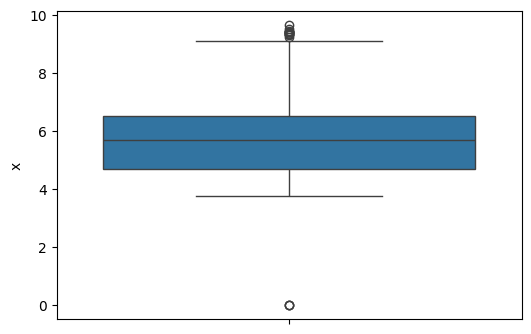

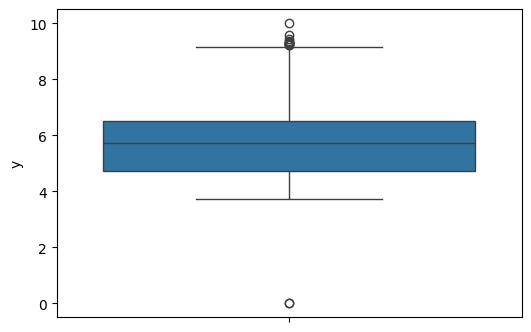

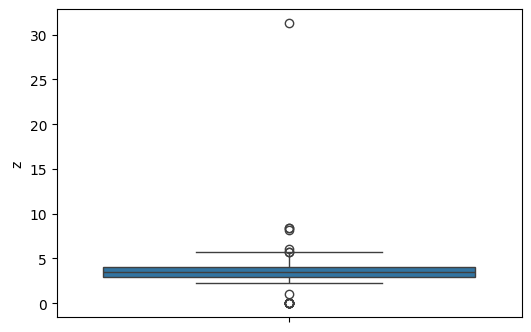

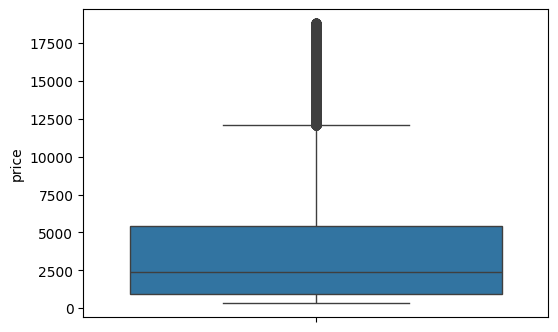

In [71]:
# checking the outliers in the numerical data

for column in num_feature:
    plt.figure(figsize=(6,4))

    sns.boxplot(data=data[column])
    print("\n")
    plt.show()

There are outliers present in the dataset

So, we have to deal with them.

## Encoding categorical features

In [72]:
# unique values in categorical data

In [73]:
data["cut"].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [74]:
data["clarity"].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [75]:
data["color"].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [76]:
# Giving custom ranking to the ordinal values of the categorical feature

cut_map = {"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal": 5}

clarity_map = {"I1": 1, "SI2": 2, "SI1": 3, "VS2": 4, "VS1": 5, "VVS2": 6, "VVS1": 7, "IF": 8}

color_map = {"J": 1, "I": 2, "H": 3, "G": 4, "F": 5, "E": 6, "D": 7}

In [77]:
# mapping the categorical features with custom rankings

data["cut"]=data["cut"].map(cut_map)

data["clarity"]=data["clarity"].map(clarity_map)

data["color"]=data["color"].map(color_map)

In [78]:
data

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,5,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,1,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...
193568,0.31,5,7,6,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,4,4,6,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,3,5,3,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,3,7,3,62.9,55.0,4.45,4.49,2.81,681
